In [10]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Fthiotidas_G'
raceDate = '2/7/2023'
surface = 'Gravel'
competition = 'Championship'

link = 'https://www.ewrc-results.com/results/84299-rally-fthiotidos-day-2-2023/?s='
startat, no_ss=426711, int(4)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [11]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [12]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [13]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [14]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Tsouloftas Ale,C1,11:42.34,-,92.4,1,Fthiotidas_G,2/7/2023,Gravel,Championship,1
1,2,#2,Kehagias Giorg,C1,11:58.20,+15.86 + 15.86,90.3 0.88,1,Fthiotidas_G,2/7/2023,Gravel,Championship,2
2,3,#5,Philippedes Yo,C1,12:04.43,+22.09 + 6.23,89.5 1.23,1,Fthiotidas_G,2/7/2023,Gravel,Championship,3
3,4,#8,Kirkos Panagio,C2,12:38.43,+56.09 + 34.00,85.5 3.11,1,Fthiotidas_G,2/7/2023,Gravel,Championship,4
4,5,#15,Karanikolas E.,C5 F2,12:57.42,+1:15.08 + 18.99,83.4 4.17,1,Fthiotidas_G,2/7/2023,Gravel,Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,19,#38,Stavropoulos D,C6 F2,25:41.76,+6:20.00 + 59.43,66.1 13.4,4,Fthiotidas_G,2/7/2023,Gravel,Championship,19
19,20,#40,Sotiropoulos N,C6 F2,25:55.13,+6:33.37 + 13.37,65.6 13.9,4,Fthiotidas_G,2/7/2023,Gravel,Championship,20
20,21,#41,Moshopoulos N.,C6 F2,26:21.79,+7:00.03 + 26.66,64.5 14.8,4,Fthiotidas_G,2/7/2023,Gravel,Championship,21
21,22,#42,Baxevanakis A.,C6,27:13.12,+7:51.36 + 51.33,62.4 16.6,4,Fthiotidas_G,2/7/2023,Gravel,Championship,22


In [15]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [16]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [17]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [18]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsouloftas Ale,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,1,702.34
1,Kehagias Giorg,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,2,718.20
2,Philippedes Yo,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,3,724.43
3,Kirkos Panagio,C2,1,Fthiotidas_G,2/7/2023,Gravel,Championship,4,758.43
4,Karanikolas E.,C5 F2,1,Fthiotidas_G,2/7/2023,Gravel,Championship,5,777.42
...,...,...,...,...,...,...,...,...,...
18,Stavropoulos D,C6 F2,4,Fthiotidas_G,2/7/2023,Gravel,Championship,19,1541.76
19,Sotiropoulos N,C6 F2,4,Fthiotidas_G,2/7/2023,Gravel,Championship,20,1555.13
20,Moshopoulos N.,C6 F2,4,Fthiotidas_G,2/7/2023,Gravel,Championship,21,1581.79
21,Baxevanakis A.,C6,4,Fthiotidas_G,2/7/2023,Gravel,Championship,22,1633.12


In [19]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race         ss          
Fthiotidas_G 1     702.34
             2    1171.34
             3     694.70
             4    1161.76

In [20]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,1,702.34,702.34,0.00,0.000000,01
1,Kehagias Giorg,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,2,718.20,702.34,15.86,2.258166,01
2,Philippedes Yo,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,3,724.43,702.34,22.09,3.145200,01
3,Kirkos Panagio,C2,1,Fthiotidas_G,2/7/2023,Gravel,Championship,4,758.43,702.34,56.09,7.986161,01
4,Karanikolas E.,C5 F2,1,Fthiotidas_G,2/7/2023,Gravel,Championship,5,777.42,702.34,75.08,10.689979,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Stavropoulos D,C6 F2,4,Fthiotidas_G,2/7/2023,Gravel,Championship,19,1541.76,1161.76,380.00,32.708993,04
107,Sotiropoulos N,C6 F2,4,Fthiotidas_G,2/7/2023,Gravel,Championship,20,1555.13,1161.76,393.37,33.859833,04
108,Moshopoulos N.,C6 F2,4,Fthiotidas_G,2/7/2023,Gravel,Championship,21,1581.79,1161.76,420.03,36.154627,04
109,Baxevanakis A.,C6,4,Fthiotidas_G,2/7/2023,Gravel,Championship,22,1633.12,1161.76,471.36,40.572924,04


In [21]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,1,702.34,702.34,0.00,0.000000,01
1,Kehagias Giorg,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,2,718.20,702.34,15.86,2.258166,01
2,Philippedes Yo,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,3,724.43,702.34,22.09,3.145200,01
3,Kirkos Panagio,C2,1,Fthiotidas_G,2/7/2023,Gravel,Championship,4,758.43,702.34,56.09,7.986161,01
5,Badounas I. -,C2,1,Fthiotidas_G,2/7/2023,Gravel,Championship,6,779.85,702.34,77.51,11.035965,01
7,Ismailos Panos,C2,1,Fthiotidas_G,2/7/2023,Gravel,Championship,8,782.57,702.34,80.23,11.423242,01
9,Angelov Mirosl,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,10,795.36,702.34,93.02,13.244298,01
10,Xanthakos M.,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,11,811.56,702.34,109.22,15.550873,01
11,Flandy - Stef,C1,1,Fthiotidas_G,2/7/2023,Gravel,Championship,12,815.77,702.34,113.43,16.150298,01
12,Theocharopoulo,C2,1,Fthiotidas_G,2/7/2023,Gravel,Championship,13,818.58,702.34,116.24,16.550389,01


In [22]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Fthiotidas_G                        
SS.                      01      02      03      04
Crew                                               
Angelov Mirosl        93.02  148.92   80.40  140.09
Badounas I.  -        77.51  131.73   96.88  124.00
Davaris Nikos        150.93     NaN     NaN     NaN
Flandy  - Stef       113.43  164.45     NaN     NaN
Ismailos Panos        80.23  133.11   90.63  138.81
Kehagias Giorg        15.86   36.06   12.42   24.38
Kirkos Panagio        56.09   77.25   49.44   97.32
Laos Costas  -       683.19  187.09  129.56  200.32
Philippedes Yo        22.09   39.88  433.31   33.84
Theocharopoulo       116.24  184.38  121.05  272.67
Tsouloftas Ale         0.00    0.00    0.00    0.00
Tzemos Konstan       429.90     NaN     NaN     NaN
Xanthakos M.         109.22  130.64   93.32  110.10

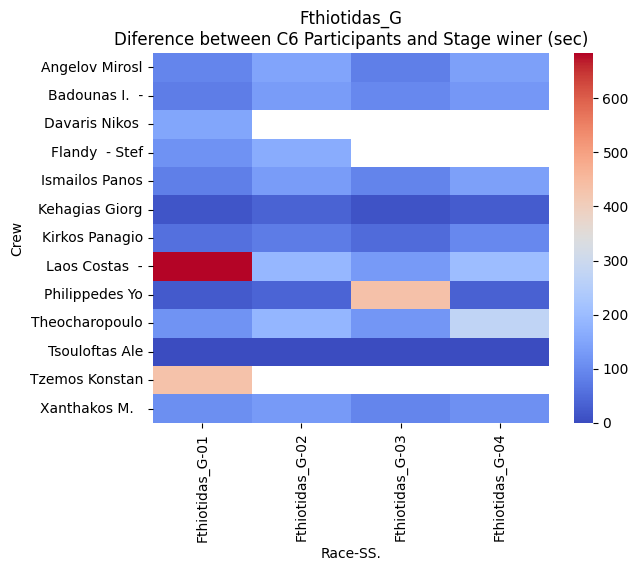

In [23]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

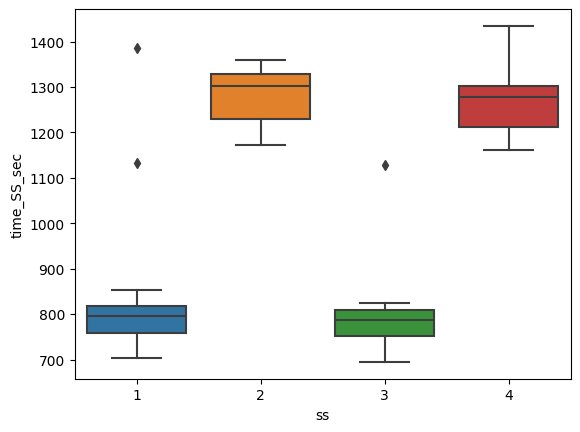

In [24]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

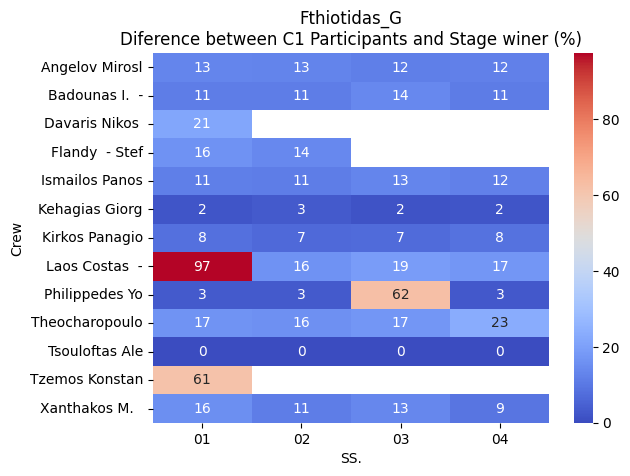

In [25]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")